# <u><u>LENDING CLUB CASE STUDY</u> </u>

# Problem Definition
# The company wants to understand the driving factors for loan default and use the insights for its portfolio and risk assesment.
<div>
<img src="/loandata.png"  width="200" height="121"/>
</div>

## The loan dataset contains the complete loan data for all loans issued through the time period 2007 t0 2011.

### Business Understanding
We are working for Lending club a finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

•If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
 
•If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

### Objective
The company wants to understand the driving factors (or driver variables) behind loan default (loan_status = 'Charged Off'), i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

IMPORTING THE NECESSARY PACKAGES

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

# To ignore warnings
warnings.filterwarnings(action='ignore')

LOADING THE DATA FROM SOURCE 

In [2]:
loans = pd.read_csv('loan.csv')
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 500)  
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [3]:
# Util function to understand the shape of dataframe 
def get_shape(df):
    rows, columns = df.shape
    print(f"The given dataset contains {rows} rows and {columns} columns")

get_shape(loans)

The given dataset contains 39717 rows and 111 columns


INSPECT THE SHAPE OF THE DATAFRAME

In [4]:
get_shape(loans)

The given dataset contains 39717 rows and 111 columns


## Data Understanding
1) The dataset given contains the information about past loan applicants and whether they ‘defaulted’ or not.

2) There are various 'borrower attributes' and 'loan attributes' which influence the tendency of default.

3) Since the aim is to identify the variables that influence the tendency of default, loan_status becomes target variable for this case study.

4) loan_status has 3 types of values, 'Fully Paid', 'Charged Off' and 'Current'. Since we are not sure about 'Current' customers whether they will default or fully pay at the end of the tenure, we will filter out 'Current' customers and will only consider 'Fully Paid' and 'Charged Off' values. Here charged off means defaulters.

5) Many columns are having null values which can be dropped

6) There are some columns which may not be required for the analysis e.g. id, member id etc.

7) There are many columns which will show the tendency of current customers who may default but this is not the objective of the case study. So we can ignore such columns e.g.delinq_2yrs, collection_recovery_fee etc.

## Data Cleaning and Manipulation

Data Quality Issues can be treated by

#### For Missing Values in the Columns:
    1) Dropping the columns containing maximum null values
    2) Dropping the coumns which are not required for the analysis
    3) Drop columns with single value
    4) Drop columns which does not add any value to analysis.

#### For Missing Values in the Rows
    1) Filter rows to perform targeted analysis
    2) Missing Value Imputation

#### Incorrect Data Types:
    1) Clean certain values/Manipulation of strings
    2) Clean and convert an entire column to correct data type e.g date, int64 etc.
    3) Converting the columns to numeric variables in order to perform more analysis.
    4) Treating outliers

# REMOVING CURRENT LOANS
##### The problem statement is focused only on the loans defaulted and not defaulted in the past, hence loan_status would be our target column
##### Lets see what unique values they have got.

In [5]:
# get unique loan status
loans.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

Lets examine the split of data based on these statuses

aggregating based on the count of loan status and resetting the index for plotting x and y

82.96 % of the loans are Fully Paid
14.17 % of the loans are Charged Off
2.87 % of the loans are Current loas


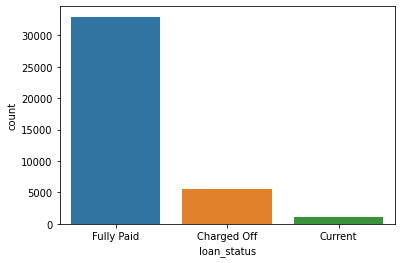

In [6]:
# loan status count aggregated
data_count_by_loan_status = loans.groupby('loan_status')['loan_status'].agg(['count']).sort_values(by='count', ascending=False)
# calculate the percent of loan status
data_count_by_loan_status['percent'] = round(data_count_by_loan_status['count']/len(loans) * 100, 2)

# reset index
data_count_by_loan_status.reset_index( inplace= True) 
data_count_by_loan_status['index'] = data_count_by_loan_status['loan_status']
data_count_by_loan_status.set_index('index', inplace=True)

sns.barplot(data=data_count_by_loan_status, x="loan_status", y="count")

print(f"{data_count_by_loan_status.loc['Fully Paid','percent']} % of the loans are Fully Paid")
print(f"{data_count_by_loan_status.loc['Charged Off','percent']} % of the loans are Charged Off")
print(f"{data_count_by_loan_status.loc['Current', 'percent']} % of the loans are Current loas")



From the above visual, it is clear that there is 2.87% of rows with `loan status = current`, which can be filtered out for this analysis 

In [7]:
# keeping only fully paid and charged off records
needed_loan_status = ['Fully Paid', 'Charged Off']

# closed loan represent which are in terminal status like fully paid or charged off 
closed_loans = loans[loans['loan_status'].isin(needed_loan_status)]

# Now let's check the shape.. the no. of rows should have been reduced now
get_shape(closed_loans)

# Lets also check the unique values to ensure current loans are removed
closed_loans['loan_status'].unique()

The given dataset contains 38577 rows and 111 columns


array(['Fully Paid', 'Charged Off'], dtype=object)

# REMOVING MISSING VALUES COLUMNS
##### The dataframe contains 111 columns. Let's examine them and remove the columns with all missing values

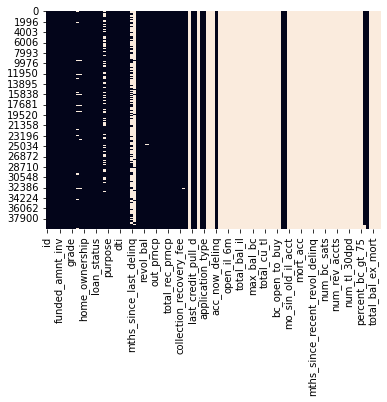

The heatmap shows majority of the columns towards the right are missing values/ empty


In [8]:
# visualize missing values using a heatmap
import seaborn as sns
sns.heatmap(closed_loans.isnull(), cbar=False,  cbar_kws={"orientation": "horizontal"})
plt.show()

print("The heatmap shows majority of the columns towards the right are missing values/ empty")

 Lets drop columns with all missing values

In [9]:
# drop all the columns with all values missing 
closed_loans = closed_loans.dropna(how='all', axis = 1)

Lets visualise again

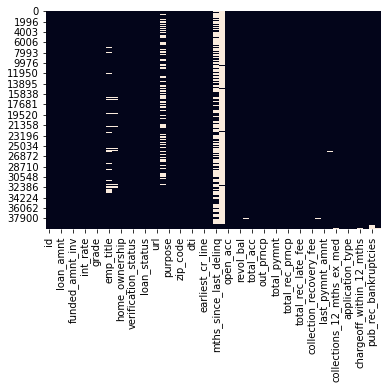

The heat map shows there are still columns with majority of values missing.. lets take the % of missing values


In [10]:
# heatmap to visulaise the missing values
sns.heatmap(closed_loans.isnull(), cbar=False,  cbar_kws={"orientation": "horizontal"})
plt.show()

print("The heat map shows there are still columns with majority of values missing.. lets take the % of missing values")

# Visualize the % of Missing values

#### Calculate the % of missing values after dropping columns with all missing values
#### We can remove any columns with missing values > 30%
#### We will do outlier treatment for columns with < 30% of  missing values and are significant for our analysis

In [11]:

def get_percent_missing_values(df):
    '''
    This function will give the % of missing values by each column 
    in a pandas data frame. The input is expected to be a valid
    pandas dataframe and the output is a dataframe containing the column
    name and the % of missing values
    '''
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
    return missing_value_df

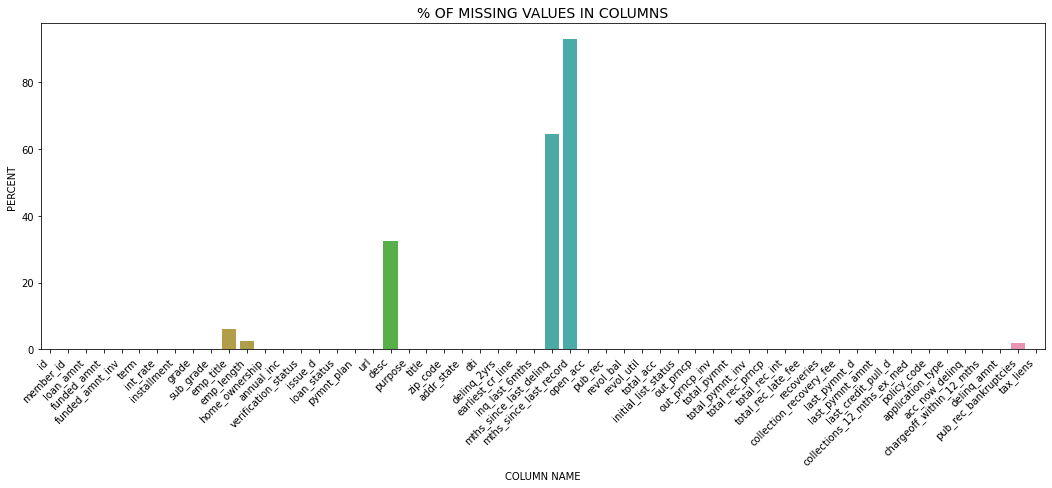

In [12]:

missing_percent = get_percent_missing_values(closed_loans)

# create a subplot
fig, ax = plt.subplots(figsize=(18, 6))

# creates a bar plot on columns and percent of missing values
vis = sns.barplot(data = missing_percent, x='column_name', y='percent_missing')
# set title
vis.set_title('% OF MISSING VALUES IN COLUMNS',fontsize=14,color='black')
# set y axis label
vis.set_ylabel('PERCENT',fontsize =10,color = 'black')
# set x axis label
vis.set_xlabel('COLUMN NAME',fontsize =10,color = 'black', ) 
# set x axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()




removing columns with more than 30% of missing values

In [13]:
# creates a list of columns to remove , which contains more than 30% missing values
cols_to_remove = missing_percent[missing_percent.percent_missing >= 30]['column_name'].to_list()
# drop columns in cols_to_remove list
closed_loans = closed_loans.drop(cols_to_remove, axis=1)
# Inspect the shape of the dataframe after dropping
get_shape(closed_loans)


The given dataset contains 38577 rows and 53 columns


The columns has now reduced to 53

# FEATURE CLEANING

##### NOW WE HAVE REMOVED THE MISSING VALUES COLUMN.LETS DO SOME FEATURE CLEANING.



FIRST WE WILL FIGURE OUT WHAT ARE NUMERIC FEATURES AND WHAT ARE CATEGORICAL FEATURES

In [14]:
def get_numeric_features(df):
    '''
    Input pandas dataframe and output list of numeric columns
    '''
    return df._get_numeric_data().columns

def get_categorical_features(df):
    '''
    Input pandas dataframe and output list of categorical columns
    '''
    all_columns = df.columns
    numeric_columns = get_numeric_features(df)

    categorical_features = list( set(all_columns) - set(numeric_columns) )
    return categorical_features
    

In [15]:

all_features = closed_loans.columns

# categorical features
categorical_features = get_categorical_features(closed_loans)

# numeric features
numeric_features = get_numeric_features(closed_loans)

print(f"The dataset contains {len(categorical_features)} categorical features out of total {len(all_features)} features")
print(f"The dataset contains {len(numeric_features)} numerical features out of total {len(all_features)} features")

The dataset contains 22 categorical features out of total 53 features
The dataset contains 31 numerical features out of total 53 features


The Dataset contains 22 categorical features and 33 numerical features

CATEGORICAL FEATURES WITH THEIR DISTINCT VALUES

Examinign the categorical column values and the value count along with their description from data dictionary

In [16]:

def examine_categorical_values(df):
    '''
    a function to examine the categorical features
    along with the description from the data dictionary
    contains the unique values and counts
    '''
    categorical_cols = get_categorical_features(df)
    data_dict = pd.read_csv('data_dictionary_loans.csv', index_col='LoanStatNew')
    
    unique_one = 0
    unique_feat = []

    for i in categorical_cols:
        print(f"{i}  - {data_dict.loc[i , 'Description']}")
        print(str(len(set(df[i]))) + " distinct values")
        if len(set(df[i])) == 1:
            unique_one = unique_one + 1
            unique_feat.append(i)

        print(df[i].value_counts())
        print("")
        print("")
    
    print(f'There are {unique_one} categorical features that has one unique value \n')
    print(f'There features are {" , ".join(str(e) for e in unique_feat)}')


examine_categorical_values(closed_loans)

title  - The loan title provided by the borrower
19298 distinct values
Debt Consolidation           2090
Debt Consolidation Loan      1620
Personal Loan                 641
Consolidation                 491
debt consolidation            478
                             ... 
Murray Loan                     1
Need debt consolidation!        1
freedom2                        1
DAVE WEDDING                    1
JAL Loan                        1
Name: title, Length: 19297, dtype: int64


purpose  - A category provided by the borrower for the loan request. 
14 distinct values
debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
                      ...  
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, Length: 14, dtype: int64


last_credit_pull_d  - The most recent month LC pulled credit for this loa

# Removing Post Loan Processing Features 
Removing Features which are not required i.e) post loan processing features, features with single unique value, credit record meta data, collection process and other
factors which does not influence the loan default status and printing them

In [17]:
## By examining the categorical features along with their description we have classified the borrower and loan categorical features

# borrower related categorical features
borrower_cat_features = [
    "home_ownership",
    "purpose",
    "emp_length",
]
# loan related categorical features
loan_cat_features = [
    "grade",
    "sub_grade",
    "loan_status",
    "term",
    "verification_status"
]

# date fields
date_cols = ["last_credit_pull_d", "issue_d", "last_pymnt_d"]


# contains categorical/numerical columns that have only one distinct value, features which are insignificant for analysis
remove_features = [
    "pymnt_plan",
    "url",
    "title",
    "initial_list_status",
    "earliest_cr_line",
    "open_acc",
    "zip_code",
    "out_prncp_inv",
    "total_pymnt_inv",
    "total_rec_prncp",
    "total_rec_int",
    "total_rec_late_fee",
    "recoveries",
    "collection_recovery_fee",
    "last_pymnt_d",
    "last_pymnt_amnt",
    "collections_12_mths_ex_med",
    "policy_code",
    "delinq_amnt",
    "tax_liens",
    "emp_title",
    "id",
    "member_id",
    "delinq_2yrs",
    "inq_last_6mths",
]


In [18]:
# List and check the relevancy of the columns to remove using their description in meta data
data_dict =pd.read_csv('data_dictionary_loans.csv', index_col='LoanStatNew')

for i in remove_features:
    print(f"{i}  - {data_dict.loc[i, 'Description']} \n")

pymnt_plan  - Indicates if a payment plan has been put in place for the loan 

url  - URL for the LC page with listing data. 

title  - The loan title provided by the borrower 

initial_list_status  - The initial listing status of the loan. Possible values are – W, F 

earliest_cr_line  - The month the borrower's earliest reported credit line was opened 

open_acc  - The number of open credit lines in the borrower's credit file. 

zip_code  - The first 3 numbers of the zip code provided by the borrower in the loan application. 

out_prncp_inv  - Remaining outstanding principal for portion of total amount funded by investors 

total_pymnt_inv  - Payments received to date for portion of total amount funded by investors 

total_rec_prncp  - Principal received to date 

total_rec_int  - Interest received to date 

total_rec_late_fee  - Late fees received to date 

recoveries  - post charge off gross recovery 

collection_recovery_fee  - post charge off collection fee 

last_pymnt_d  - Last

In [19]:
# removing the categorical features which are not needed for analysis
cleaned_data = closed_loans.drop(remove_features, axis= 1)

print(f"{len(remove_features)} number of features removed {len(cleaned_data.columns)} features are taken for further analysis")

25 number of features removed 28 features are taken for further analysis


# CHECK FOR DUPLICATE ROWS

In [20]:
# checking for duplicate rows
print(f" There are {len(cleaned_data[cleaned_data.duplicated()])} duplicate rows in the dataset" )

 There are 0 duplicate rows in the dataset


# INSPECT THE DATA IN DATAFRAME BEFORE CORRECTING AND STANDARDISING TYPES

In [21]:
cleaned_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,last_credit_pull_d,application_type,acc_now_delinq,chargeoff_within_12_mths,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,13648,83.70%,9,0.0,5863.155187,May-16,INDIVIDUAL,0,0.0,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,1687,9.40%,4,0.0,1008.710000,Sep-13,INDIVIDUAL,0,0.0,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,2956,98.50%,10,0.0,3005.666844,May-16,INDIVIDUAL,0,0.0,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,5598,21%,37,0.0,12231.890000,Apr-16,INDIVIDUAL,0,0.0,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,7963,28.30%,12,0.0,5632.210000,Jan-16,INDIVIDUAL,0,0.0,0.0


In [22]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_amnt                 38577 non-null  int64  
 1   funded_amnt               38577 non-null  int64  
 2   funded_amnt_inv           38577 non-null  float64
 3   term                      38577 non-null  object 
 4   int_rate                  38577 non-null  object 
 5   installment               38577 non-null  float64
 6   grade                     38577 non-null  object 
 7   sub_grade                 38577 non-null  object 
 8   emp_length                37544 non-null  object 
 9   home_ownership            38577 non-null  object 
 10  annual_inc                38577 non-null  float64
 11  verification_status       38577 non-null  object 
 12  issue_d                   38577 non-null  object 
 13  loan_status               38577 non-null  object 
 14  purpos

###### OBSERVATION
1) We can remove the percentage sign from "int_rate" , "revol_util" and convert them to numeric types 

2) We can create derived columns like issued date and month from "issue_d"

3) "emp_length", "revol_util", "pub_rec_bankruptcies" has missing values and it has to be treated.

4) Fix the data types in "funded_amnt" and "funded_amnt_inv" to integers

5) Fix the data type of "issue_d" to date time.


In [23]:
cleaned_data['int_rate'] = cleaned_data['int_rate'].str.rstrip('%')
cleaned_data['revol_util'] = cleaned_data['revol_util'].str.rstrip('%')

After standardising int_rate and revol_util

In [24]:
cleaned_data.loc[1:3, ['int_rate', 'revol_util']]

,int_rate,revol_util
1,15.27,9.40
2,15.96,98.50
3,13.49,21


# STANDARDISE NUMERIC COLUMNS

In [25]:
# Datatype before casting
print('Datatype before casting: ')
print(cleaned_data[['int_rate', 'revol_util', 'funded_amnt', 'funded_amnt_inv', 'loan_amnt', 'annual_inc']].dtypes)

# Casting to numeric datatype
cleaned_data[['int_rate', 'revol_util', 'funded_amnt', 'funded_amnt_inv',  'loan_amnt', 'annual_inc']] = cleaned_data[['int_rate', 'revol_util', 'funded_amnt', 'funded_amnt_inv', 'loan_amnt', 'annual_inc']].apply(pd.to_numeric)

# Datatype after casting
print('\nDatatype after casting: ')
print(cleaned_data[['int_rate', 'revol_util', 'funded_amnt', 'funded_amnt_inv',  'loan_amnt', 'annual_inc']].dtypes)


Datatype before casting: 
int_rate            object
revol_util          object
funded_amnt          int64
funded_amnt_inv    float64
loan_amnt            int64
annual_inc         float64
dtype: object

Datatype after casting: 
int_rate           float64
revol_util         float64
funded_amnt          int64
funded_amnt_inv    float64
loan_amnt            int64
annual_inc         float64
dtype: object


# STANDARDIZE DATE COLUMNS

In [26]:
# Data before casting:
print('Data before casting: ')
print(cleaned_data['issue_d'].head())

# Data casting to datetime format:
cleaned_data['issue_d'] = pd.to_datetime(cleaned_data['issue_d'], format='%b-%y')

# Data after casting:
print('\nData after casting: ')
print(cleaned_data['issue_d'].head())

Data before casting: 
0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

Data after casting: 
0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
5   2011-12-01
Name: issue_d, dtype: datetime64[ns]


Check if installment amount is greater than loan_amount

In [27]:
cleaned_data[cleaned_data['installment'] > cleaned_data['loan_amnt']  ]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,last_credit_pull_d,application_type,acc_now_delinq,chargeoff_within_12_mths,pub_rec_bankruptcies


In [28]:
cleaned_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,last_credit_pull_d,application_type,acc_now_delinq,chargeoff_within_12_mths,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,13648,83.7,9,0.0,5863.155187,May-16,INDIVIDUAL,0,0.0,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,1687,9.4,4,0.0,1008.710000,Sep-13,INDIVIDUAL,0,0.0,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2956,98.5,10,0.0,3005.666844,May-16,INDIVIDUAL,0,0.0,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,5598,21.0,37,0.0,12231.890000,Apr-16,INDIVIDUAL,0,0.0,0.0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,7963,28.3,12,0.0,5632.210000,Jan-16,INDIVIDUAL,0,0.0,0.0


# MISSING VALUE TREATMENT

IDENTIFYING FEATURES WITH MISSING VALUES

Features with missing value between 0 - 30%

In [29]:
# Do missing value treatment for columns with <30% missing values and add significane to our analysis
missing_value_feats = get_percent_missing_values(cleaned_data)
missing_value_feats = missing_value_feats[(missing_value_feats['percent_missing'] < 30) & (missing_value_feats['percent_missing'] > 0)]

missing_value_feats

,column_name,percent_missing
emp_length,emp_length,2.677761
revol_util,revol_util,0.129611
last_credit_pull_d,last_credit_pull_d,0.005184
chargeoff_within_12_mths,chargeoff_within_12_mths,0.145164
pub_rec_bankruptcies,pub_rec_bankruptcies,1.806776


In [30]:
# Count of missing values before treatment
print('Count of missing values before treatment: ')
print('emp_length:', cleaned_data['emp_length'].isnull().sum())
print('pub_rec_bankruptcies:', cleaned_data['pub_rec_bankruptcies'].isnull().sum())


# Missing value treatment - Imputing the missing values using mode
# Replacing with mode for emp_length and pub_rec_bankruptcies
cleaned_data['emp_length'] = cleaned_data['emp_length'].fillna(cleaned_data['emp_length'].mode()[0])
cleaned_data['pub_rec_bankruptcies'] = cleaned_data['pub_rec_bankruptcies'].fillna(cleaned_data['pub_rec_bankruptcies'].mode()[0])


# Count of missing values after treatment
print('\nCount of missing values after treatment: ')
print('emp_length:', cleaned_data['emp_length'].isnull().sum())
print('pub_rec_bankruptcies:', cleaned_data['pub_rec_bankruptcies'].isnull().sum())


Count of missing values before treatment: 
emp_length: 1033
pub_rec_bankruptcies: 697

Count of missing values after treatment: 
emp_length: 0
pub_rec_bankruptcies: 0


### Data Analysis
    1) Derived Metrics
    2) Univariate Analysis
    3) Segmented Univariate Analysis
    4) Bivariate Analysis
    5) Multivariate Analysis

#### Derived Metrics
    1) Create derived metrics for issue month and year
    2) Create derived metrics for binning loan amount 
    3) Create derived metrics for binning interest rate
    4) Create derived metrics for binning dti

In [31]:
# Derivng year attribute
cleaned_data['issue_year']=cleaned_data['issue_d'].dt.year

# Deriving month attribute
cleaned_data['issue_month']=cleaned_data['issue_d'].dt.month

# Data with derived columns
print('Data sample with derived columns: ')
cleaned_data[['issue_d', 'issue_year', 'issue_month']].head()

# categorise loan amounts into buckets which will help in analysis further in bivariate analysis.
cleaned_data['loan_amnt_cats'] = pd.cut(cleaned_data['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

# categorise annual incomes into buckets which will help in analysis further in bivariate analysis.
cleaned_data['annual_inc_cats'] = pd.cut(cleaned_data['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
cleaned_data['int_rate_cats'] = pd.cut(cleaned_data['int_rate'], [0, 5, 9, 13, 17, 21, 25], labels=['0-5%', '5-9%', '9-13%', '13-17%', '17-21%', '21-25%'])

cleaned_data['loan_amnt_inc_ratio'] = cleaned_data['loan_amnt']/cleaned_data['annual_inc']
# categorise dti into buckets for bivariate analysis.
cleaned_data['dti_cats'] = pd.cut(cleaned_data['dti'], [0, 5, 10, 15, 20, 25, 30], labels=['0-5', '05-10', '10-15', '15-20','20-25', '25-30'])

Data sample with derived columns: 


#### Features with same correlation

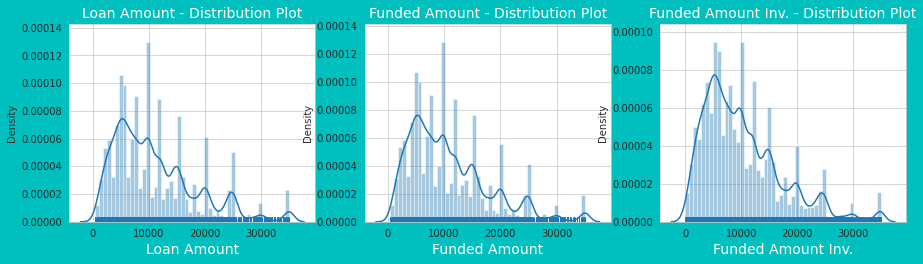

In [32]:
# checking the distribution of three loan amount fields using distribution plot.
plt.figure(figsize=(15,8),facecolor='c')
sns.set_style("whitegrid")

# for loan amount
plt.subplot(2, 3, 1)
ax = sns.distplot(cleaned_data['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')

# for funded amount
plt.subplot(2, 3, 2)
ax = sns.distplot(cleaned_data['funded_amnt'],rug = True)
ax.set_title('Funded Amount - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Funded Amount',fontsize=14,color='w')

# for funded amount inv
plt.subplot(2, 3, 3)
ax = sns.distplot(cleaned_data['funded_amnt_inv'],rug = True)
ax.set_title('Funded Amount Inv. - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Funded Amount Inv.',fontsize=14,color='w')
plt.show()

#### Loan amount, Funded amount, Funded amount inv tend to have same distribution and correlation. Hence we can use any one of them . In our case we use Loan amount.

## Univariate Analysis
Following fields will be checked as part of univariate analysis

### 1) Quantitative
                Interest rate 
                Annual income 
                Loan amount
                Debt to Income Ratio
### 2) Ordered Categorical variables
                Grade
                Sub grade
                Term
                Employment length
                Loan issue year
                Loan issue month

### 3) Un-ordered categorical data
                State
                Loan purpose
                Home Ownership
                Loan status


In [33]:
def create_dist_box_plot(data, column_name, description):
    '''
    A re-usable function which creates a distribution plot
    and a box plot for numeric values. This will be used
    in our univariate analysis
    '''
    # sets the figure size and back ground style
    plt.figure(figsize=(15,8),facecolor='c')
    sns.set_style("dark")
    # plots the distribution plot on loan amount
    plt.subplot(2, 2, 1)
    ax = sns.distplot(data[column_name],rug = True)
    ax.set_title(f'{description} - Distribution Plot',fontsize=16, color='w')
    ax.set_xlabel(description,fontsize=14,color='w')

    # plots the box plot on loan amount
    plt.subplot(2, 2, 2)
    ax = sns.boxplot(x=data[column_name])
    ax.set_title(f'{description} - Box Plot', fontsize=16, color='w')
    ax.set_ylabel(description,fontsize=14,color='w')
    plt.show()



ANNUAL INCOME 

Univariate analysis on annual income shows that there are outliers far above the upper fence of the box plot.Lets treat
them by removing the outliers above 99th percentile in the outlier treament section.



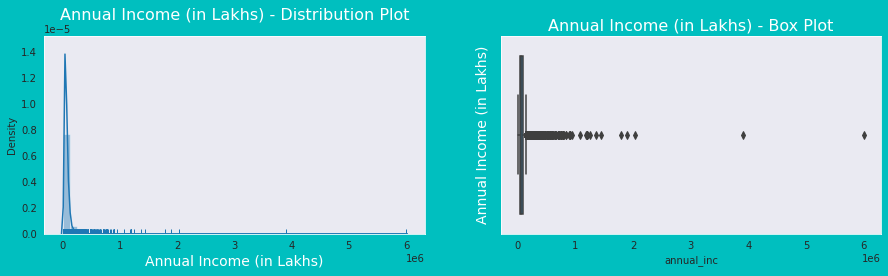

In [34]:
create_dist_box_plot(cleaned_data, 'annual_inc', 'Annual Income (in Lakhs)')


In [35]:
print('Numerical Summary: ')
print('Mean:', cleaned_data['annual_inc'].mean())
print('Median:', cleaned_data['annual_inc'].quantile(0.5))
print('90% Data', cleaned_data['annual_inc'].quantile(0.9))
print('99% Data:', cleaned_data['annual_inc'].quantile(0.99))
print('100% Data:', cleaned_data['annual_inc'].quantile(1))

Numerical Summary: 
Mean: 68777.97368120901
Median: 58868.0
90% Data 115000.0
99% Data: 234143.99999999878
100% Data: 6000000.0


##### OUTLIER TREATMENT - Annual Income

In [36]:
cleaned_data['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

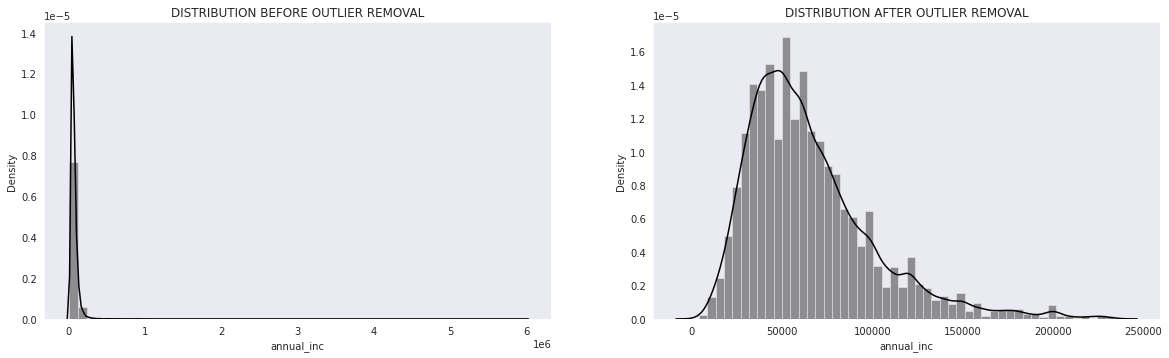

In [37]:
# Distribution plot before outlier removal
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
ax = sns.distplot(cleaned_data['annual_inc'], color='black')
ax.set_title('DISTRIBUTION BEFORE OUTLIER REMOVAL')

# Removing outliers
cleaned_data = cleaned_data[cleaned_data['annual_inc'] < cleaned_data['annual_inc'].quantile(0.99)]

# Distribution plot after outlier removal
plt.subplot(2,2,2)
ax = sns.distplot(cleaned_data['annual_inc'], color='black')
ax.set_title('DISTRIBUTION AFTER OUTLIER REMOVAL')
plt.show()


Annual Income - After Outlier Treatment
The annual income box plot shows a continuos distribution after the outliers has been removed. Although there are datpoints exists beyound the upper fence, the numbers are continuos. hence we dont remove them.

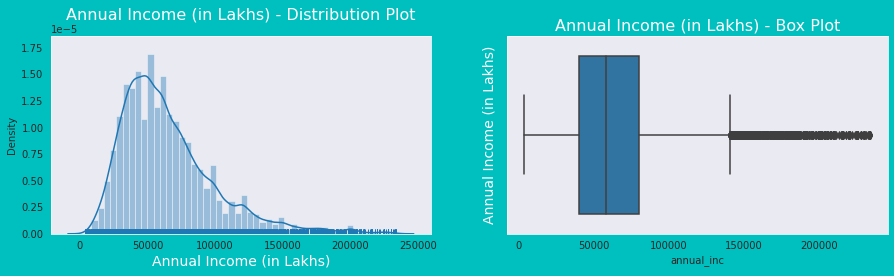

In [38]:
create_dist_box_plot(cleaned_data, 'annual_inc', 'Annual Income (in Lakhs)')

Notice that the mean and the median annual income are close to each other after outlier removal

In [39]:
cleaned_data['annual_inc'].describe()

count     38191.000000
mean      65313.610090
std       35150.773045
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       80232.000000
max      234000.000000
Name: annual_inc, dtype: float64

### LOAN AMOUNT

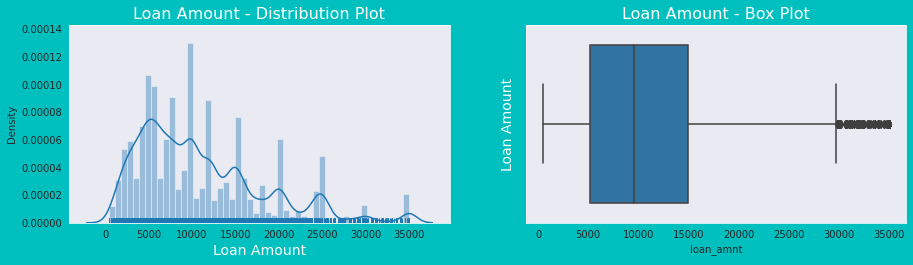

In [40]:
create_dist_box_plot(cleaned_data, 'loan_amnt', 'Loan Amount')

## INTEREST RATE

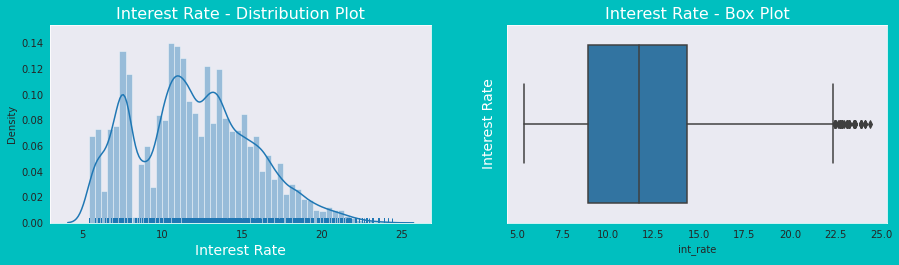

In [41]:
create_dist_box_plot(cleaned_data, 'int_rate', 'Interest Rate')


In [42]:
cleaned_data['int_rate'].describe()

count    38191.000000
mean        11.917876
std          3.684108
min          5.420000
25%          8.940000
50%         11.710000
75%         14.350000
max         24.400000
Name: int_rate, dtype: float64

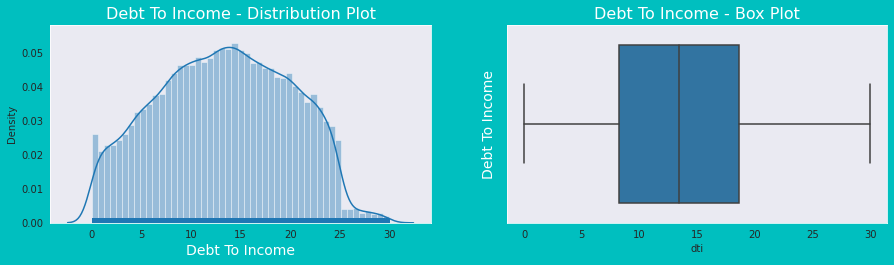

In [43]:
create_dist_box_plot(cleaned_data, 'dti', 'Debt To Income')


In [44]:
cleaned_data['dti'].describe()

count    38191.000000
mean        13.333491
std          6.657843
min          0.000000
25%          8.210000
50%         13.430000
75%         18.600000
max         29.990000
Name: dti, dtype: float64

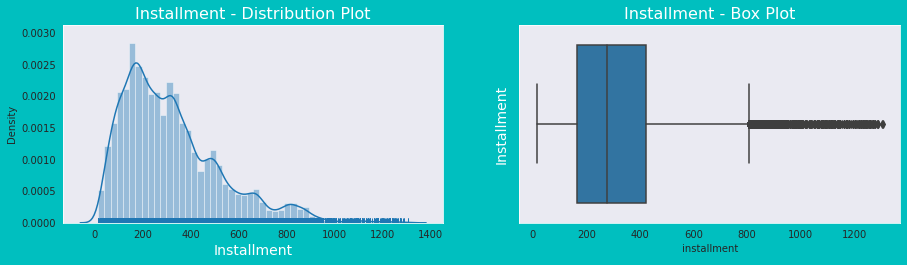

In [45]:
create_dist_box_plot(cleaned_data, 'installment', 'Installment')


In [46]:
cleaned_data['installment'].describe()

# cleaned_data['installment'].quantile(.99)

count    38191.000000
mean       319.938941
std        205.948407
min         15.690000
25%        165.380000
50%        276.300000
75%        421.800000
max       1305.190000
Name: installment, dtype: float64

#### OBSERVATIONS - Univariate on Quantitative variables
- Annual Income had outliers which are far away from the upper fence and treated by removing the values above 99 percentile
- Most of the applicants had annual income between 50,000 to 1,00,000
- Most loans had interest rate between 12 - 14 %
- Most loans had 200 - 400 installments
- Most loans had DTI between 10 - 20
- There are too many small loans in the range 5,000 to 10,000. 

### Univariate on Ordered Categorical variables

In [47]:
def cat_count_plot(dataframe, column):
    '''
    creates count plot for categorical variables
    '''
    print('\n\n')
    fig, ax = plt.subplots(figsize=(10,6)  , dpi=100)
    bg_color = '#ffd9d9'
    fig.set_facecolor(bg_color)
    sns.countplot(x=column, data=dataframe, order = dataframe[column].value_counts().index)
    ax.set_xlabel(column)
    ax.set_ylabel('No of loans')
    ax.set_title('Plot of ' + column, weight='bold')
    plt.xticks(rotation=45)
    # for p in ax.patches:
    #  ax.annotate('{:1}'.format(p.get_height()), (p.get_x()+x, p.get_height()+10))
    plt.show()

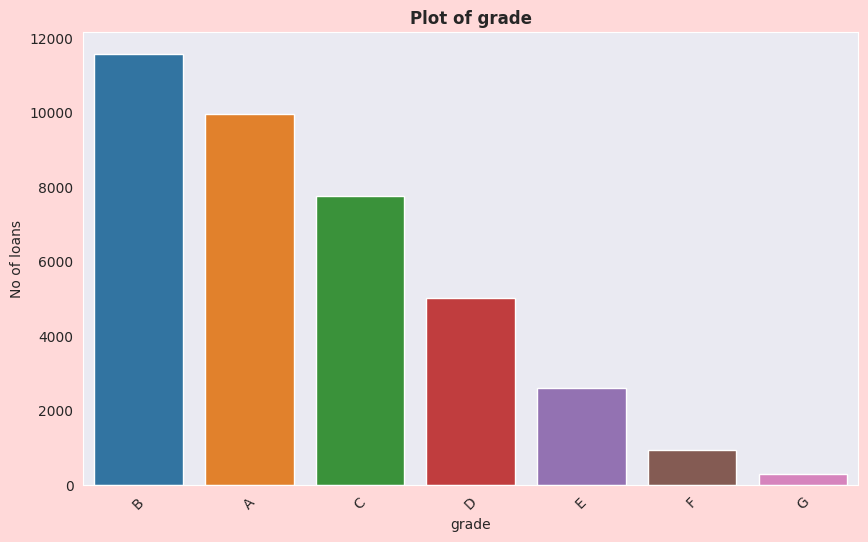

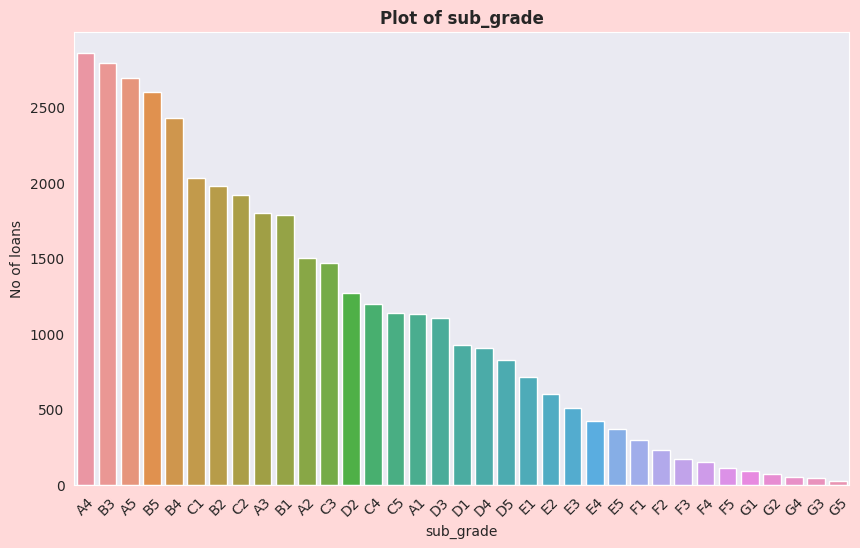

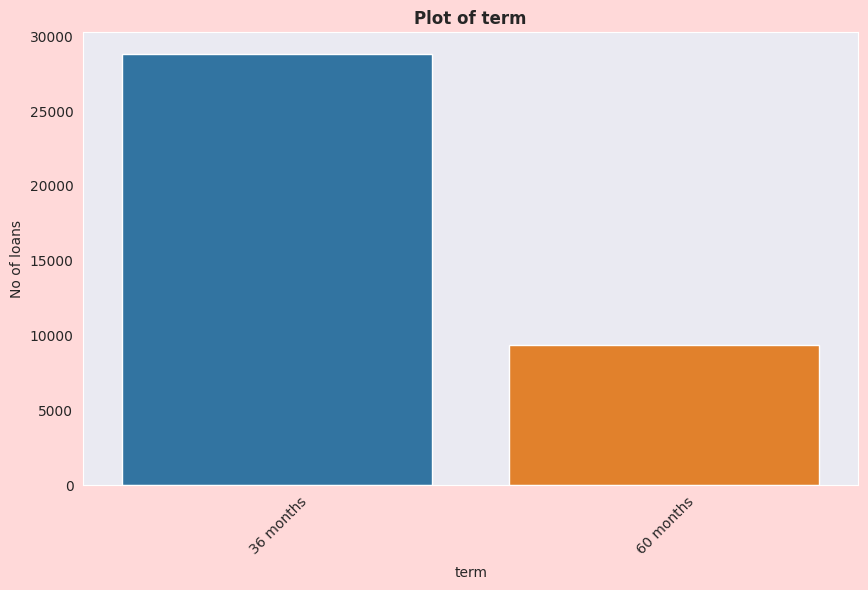

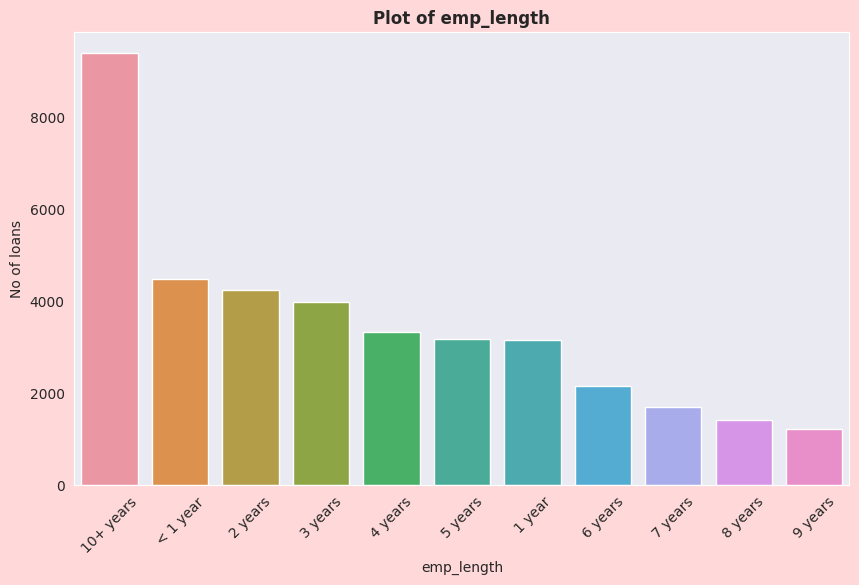

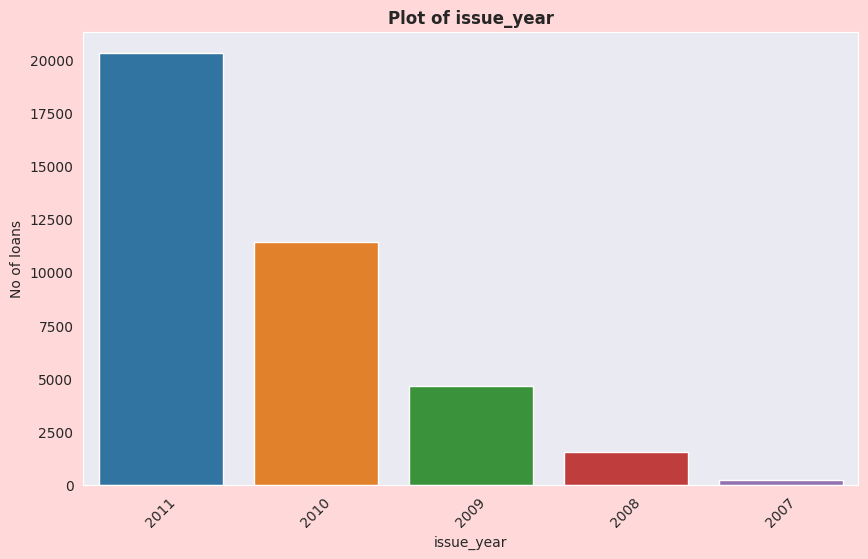

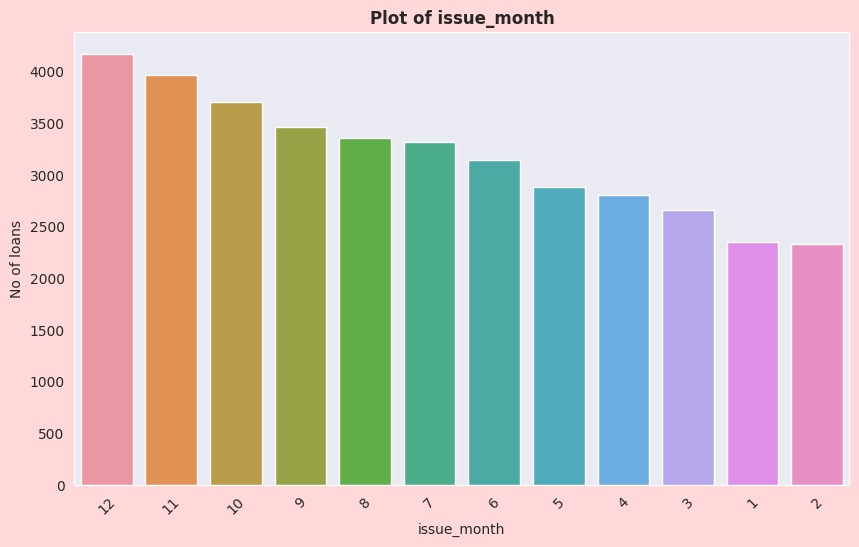

In [48]:
# Loop through the significant categorical variables and create the count plot
for column in ["grade", "sub_grade","term","emp_length","issue_year","issue_month"]:
    cat_count_plot(cleaned_data, column)

#### OBSERVATIONS - Univariate on Ordered Categorical variables
- Plot on employment length shows that borrowers with experience more than 10 + years tend to get lot of loans than borrowers with lesser experience
- Plot on issue year and month shows that the no. of loans tend to increase with year from 2007 -2011. There are more no. of loans on 2011
- Plot on terms shows that 36 month loans are issued more when compared to 60 month loans
- Plot on grade shows more loans are given to B, A and C
- Plot on sub-grade shows more loans are  given to A4, B3, A5, B5, B4
- Plot of issue month shows there is increasing trend in number of loans with increase in the months. Maximum loans were given in the month of Oct, Nov, Dec.May be due to festive season


#### Un-Ordered Categorical variables - Univariate analysis


#### Loan Status

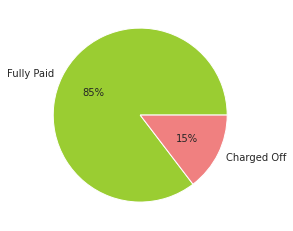

In [49]:
# Create a pie chart on the loan status composition
loan_counts_by_status = cleaned_data.loan_status.value_counts()
labels = ['Fully Paid','Charged Off']
colors = ['yellowgreen', 'lightcoral']
plt.pie(loan_counts_by_status, labels=labels, colors = colors, autopct = '%0.0f%%')

plt.show()

#### Loan Purpose

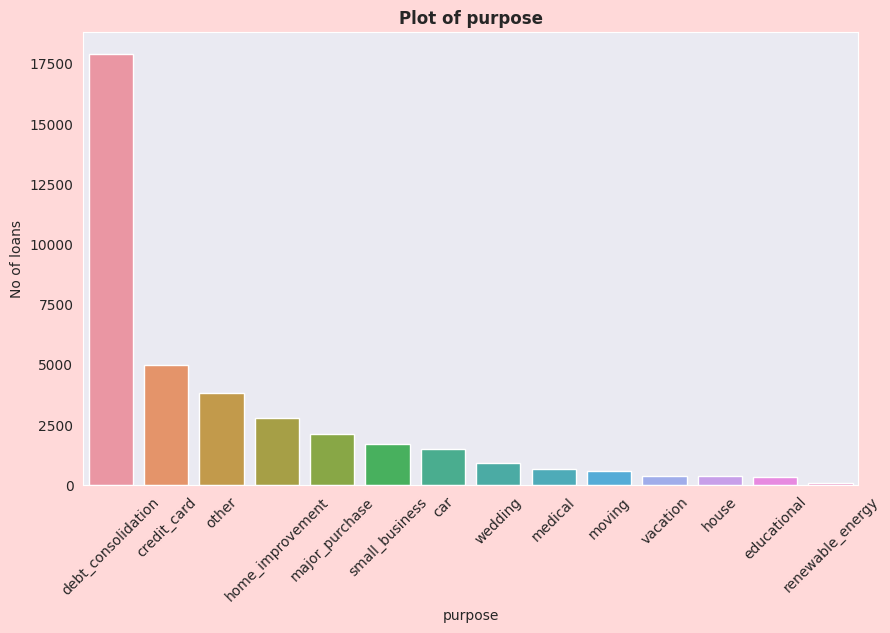

In [50]:
cat_count_plot(cleaned_data, 'purpose')

#### Home Ownership

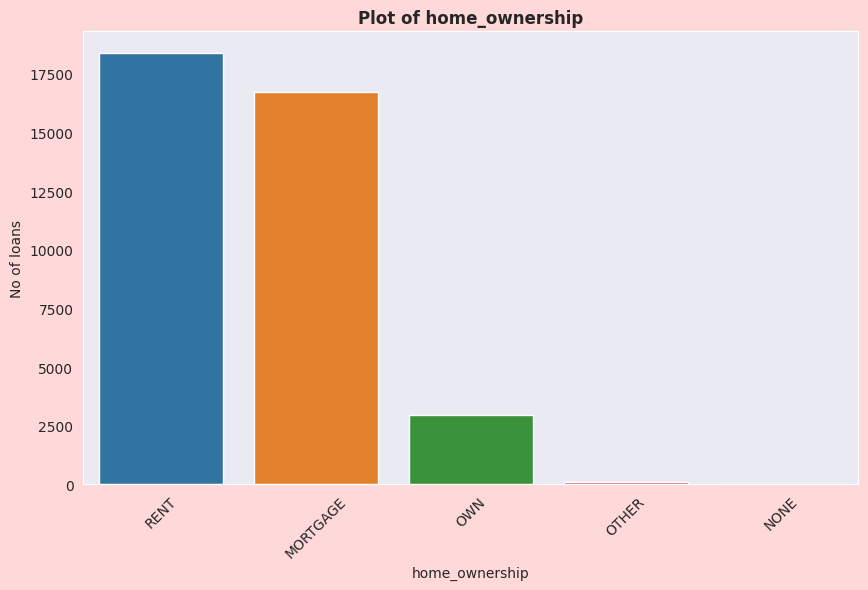

In [51]:
cat_count_plot(cleaned_data, 'home_ownership')

#### OBSERVATIONS - Univariate on Un-Ordered Categorical variables
- Most of the borrowers dont have a own house. They either live in rented or mortgaged ones. 
- There is a good trend that shows most of the loans are for debt consolidation and credit card 
- 15 % of the loans are charged off

#### Segmented Univariate Analysis
    - Interest Rate Categories
    - Loan Amount Categories
    - DTI categories
    - Annual Income Categories

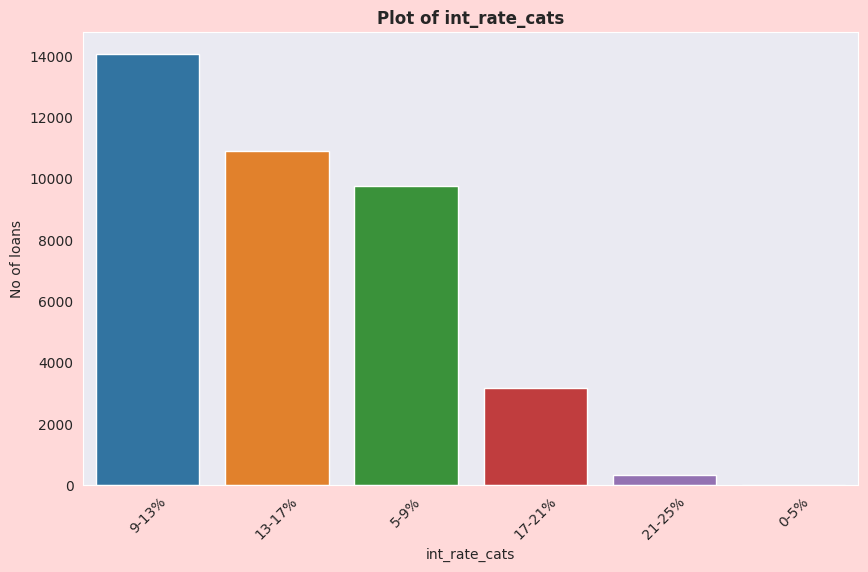

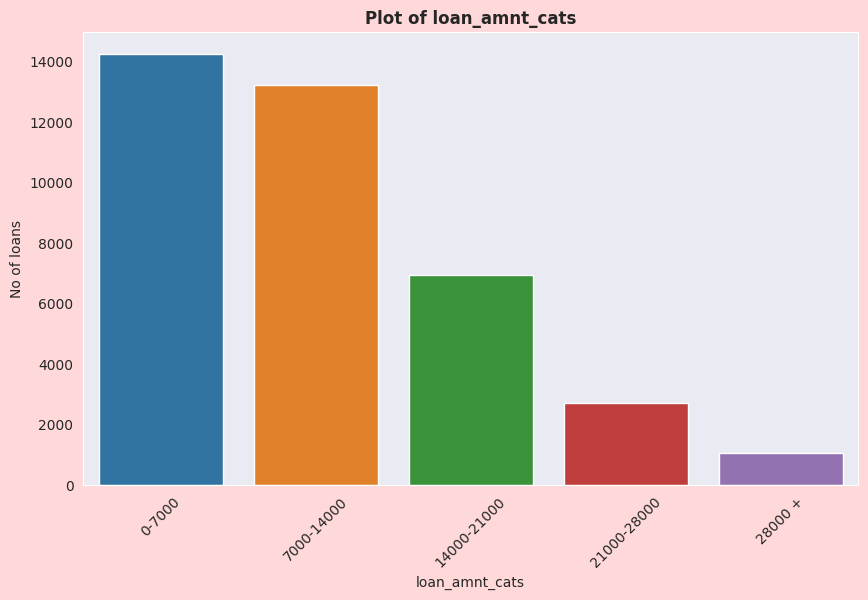

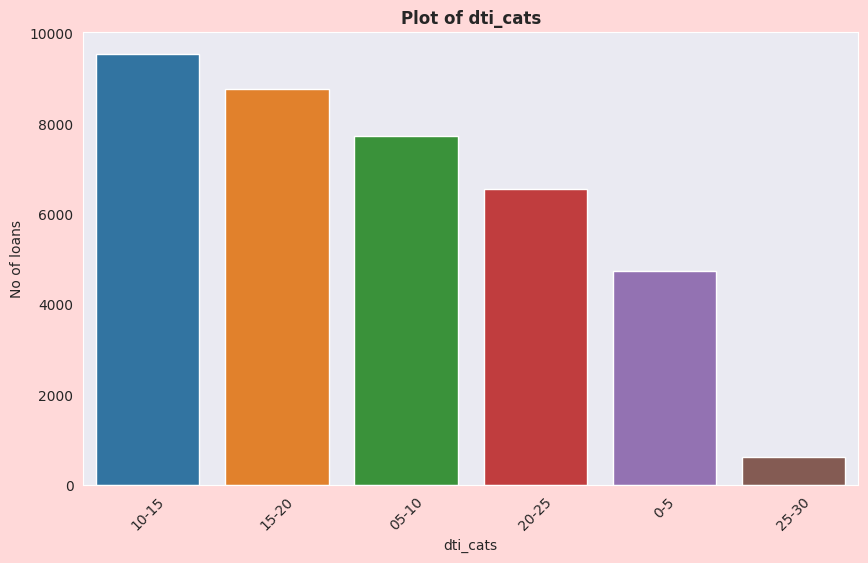

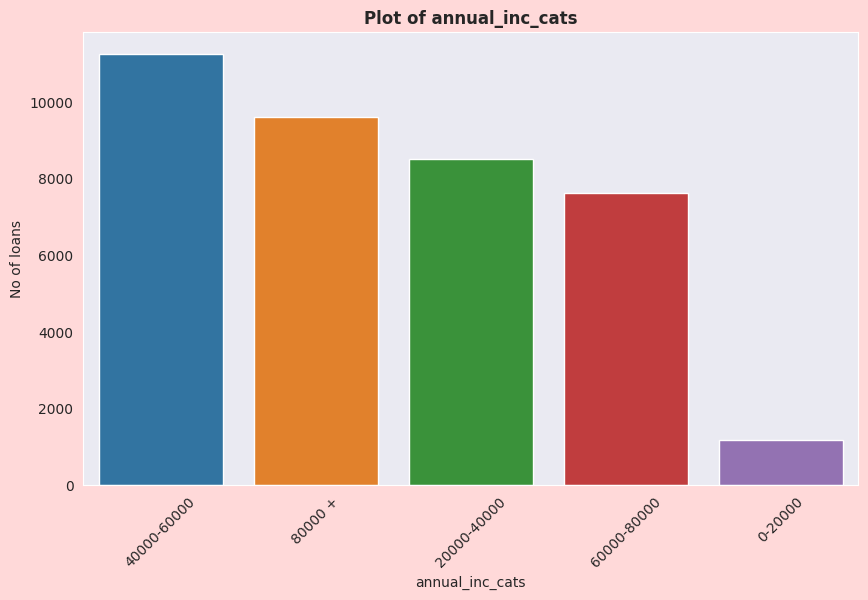

In [52]:
for columns in ['int_rate_cats', 'loan_amnt_cats', 'dti_cats', 'annual_inc_cats']:
    cat_count_plot(cleaned_data, columns)

#### OBSERVATIONS - Segmented Univariate Analysis
    - Most of the loans have interest rate category of 9-13%  and very few loans have interest rate range of 21- 25%
    - Most of the loans has DTI category of 10-15 is 
    - Most of the borrowers have annual income range of 40,000 - 60,000
    - Most of the loan amounts is less than 7000

# BIVARIATE ANALYSIS 

### 1) Quantitative
        Interest rate
        Annual income
        DTI
        Loan amount

### 2) Ordered categorical data
        Grade
        Sub grade
        Term (36 / 60 months)
        Employment length
        Year
        Month
### 3) Un-ordered categorical data
        State
        Loan purpose
        Home Ownership
        Verified status



In [53]:
# Creating dataframe with feature value "Charged Off":
defaulted_loans = cleaned_data[cleaned_data['loan_status'] == 'Charged Off']

# Looking into the nature of data:
print(f'The defaulted loan data has {defaulted_loans.shape[0]} rows and {defaulted_loans.shape[1]} columns')
print(f'The unique value is {defaulted_loans["loan_status"].unique()}')

The defaulted loan data has 5584 rows and 35 columns
The unique value is ['Charged Off']


## BIVARIATE ANALYSIS - QUANTITATIVE VARIABLES

### Interest Rate vs Loan Status

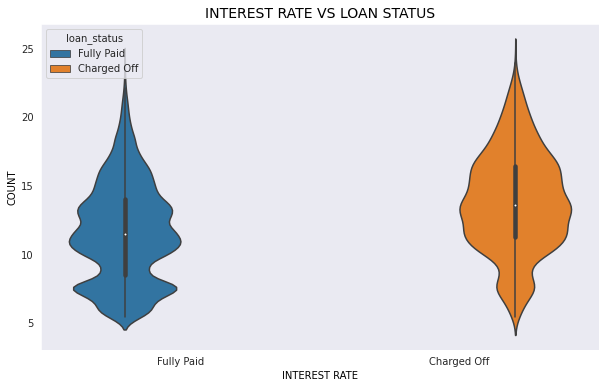

In [54]:
plt.figure(figsize=(10,6))
ax = sns.violinplot(data=cleaned_data, x="loan_status", y="int_rate", hue="loan_status")

ax.set_title('INTEREST RATE VS LOAN STATUS',fontsize=14,color='black')
ax.set_ylabel('COUNT',fontsize =10,color = 'black')
ax.set_xlabel('INTEREST RATE',fontsize =10,color = 'black')
plt.show()

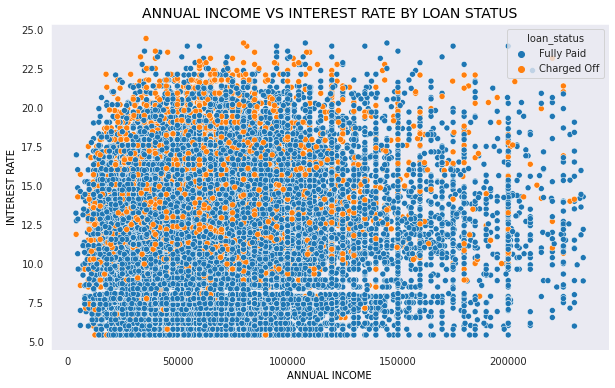

In [55]:
plt.figure(figsize=(10,6))

ax = sns.scatterplot(data=cleaned_data, x="annual_inc", y="int_rate", hue="loan_status")

# # Naming the axis and title
ax.set_title('ANNUAL INCOME VS INTEREST RATE BY LOAN STATUS',fontsize=14,color='black')
ax.set_ylabel('INTEREST RATE',fontsize =10,color = 'black')
ax.set_xlabel('ANNUAL INCOME',fontsize =10,color = 'black')
plt.show()

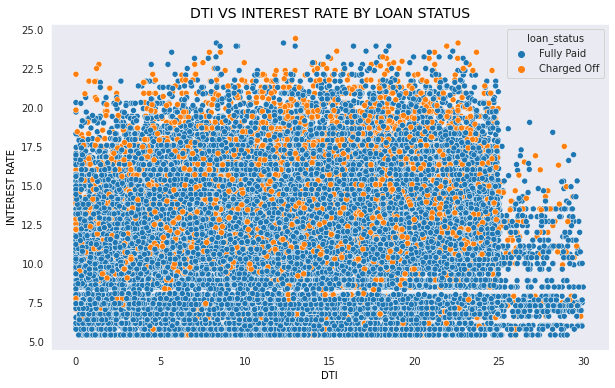

In [56]:
plt.figure(figsize=(10,6))

ax = sns.scatterplot(data=cleaned_data, x="dti", y="int_rate", hue="loan_status")

# # Naming the axis and title
ax.set_title('DTI VS INTEREST RATE BY LOAN STATUS',fontsize=14,color='black')
ax.set_ylabel('INTEREST RATE',fontsize =10,color = 'black')
ax.set_xlabel('DTI',fontsize =10,color = 'black')
plt.show()

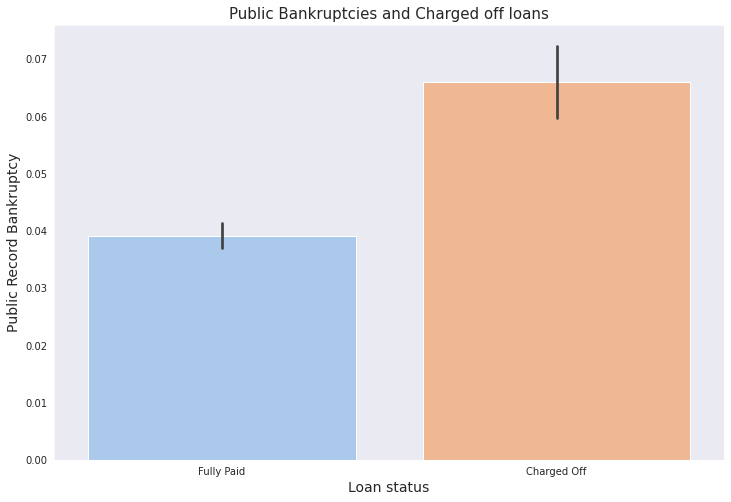

In [57]:

plt.figure(figsize=(12,8))
ax = sns.barplot(y='pub_rec_bankruptcies', x='loan_status', data =cleaned_data,palette='pastel')
ax.set_title('Public Bankruptcies and Charged off loans',fontsize=15)
ax.set_ylabel('Public Record Bankruptcy',fontsize=14)
ax.set_xlabel('Loan status',fontsize=14)
plt.show()

### OBSERVATIONS - BIVARIATE ON QUANTITATIVE VARIABLES
 -  The violin plot shows the distribution of interest rates on charged off loans on the higher end 13 - 22% when compared to fully-paid loans, which reveals interest rate is one of the driving factor for loan default
 -  When the loan interest rate is greater than 16 % and the annual income of the person is less than 100000, the loan is more likely to be    defaulted. This reveals annual income and interest rate has a positive correlation to loan default.
 - When the debt to income ratio is more than 13 and interest rate is higher than 15 likely to default
- Giving loans at interest rate when the annual income is  < 1,50,000 leads to loan default
 - Customers with DTI greater than 15 is more likely to default
 - Loan defaulting increases with increase in public bankruptcy records. People with public bankruptcy record tend to default more.

### BIVARIATE ANALYSIS - Orderded Categorical variables

#### Grades vs Loan Amount

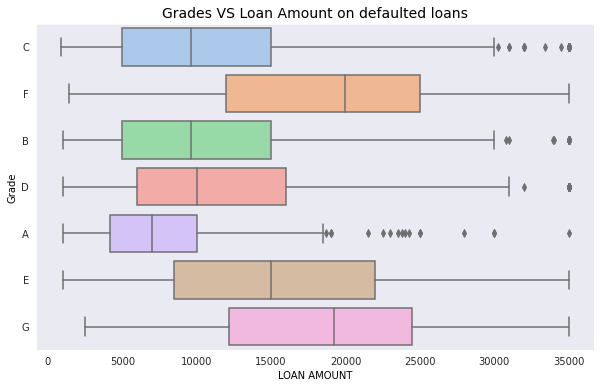

In [58]:
plt.figure(figsize=(10,6))

fig = sns.boxplot(y='grade', x='loan_amnt', data =defaulted_loans,palette='pastel')

fig.set_title('Grades VS Loan Amount on defaulted loans',fontsize=14,color='black')
fig.set_ylabel('Grade',fontsize =10,color = 'black')
fig.set_xlabel('LOAN AMOUNT',fontsize =10,color = 'black')
plt.show()

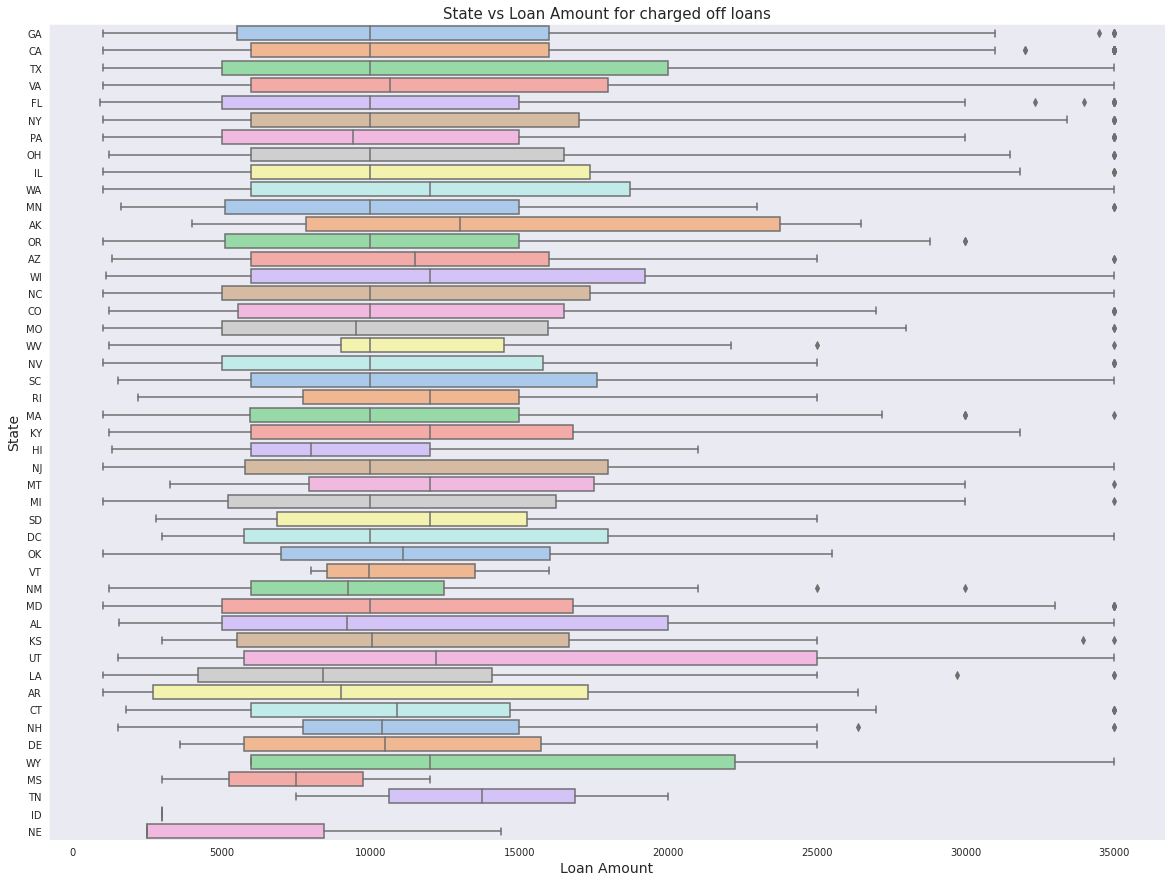

In [59]:
plt.figure(figsize=(20,15))
ax = sns.boxplot(y='addr_state', x='loan_amnt', data  =defaulted_loans,palette='pastel')
ax.set_title('State vs Loan Amount for charged off loans',fontsize=15)
ax.set_ylabel('State',fontsize=14)
ax.set_xlabel('Loan Amount',fontsize=14)
plt.show()

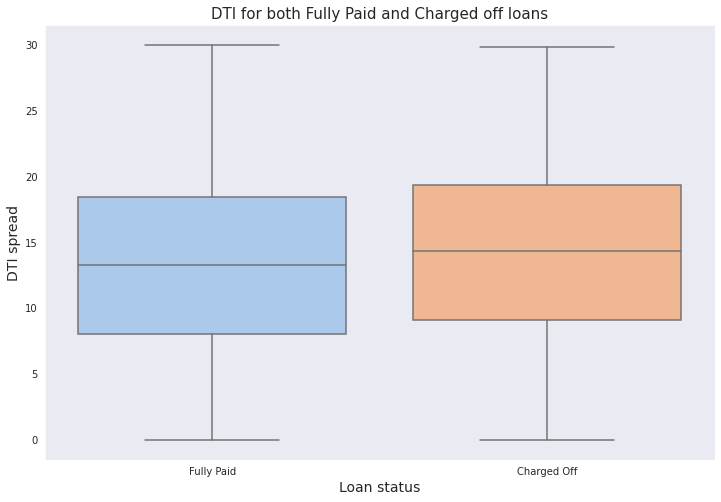

In [60]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(y='dti', x='loan_status', data =cleaned_data,palette='pastel')
ax.set_title('DTI for both Fully Paid and Charged off loans',fontsize=15)
ax.set_ylabel('DTI spread',fontsize=14)
ax.set_xlabel('Loan status',fontsize=14)
plt.show()

### Employment Length vs Loan Default on defaulted loan

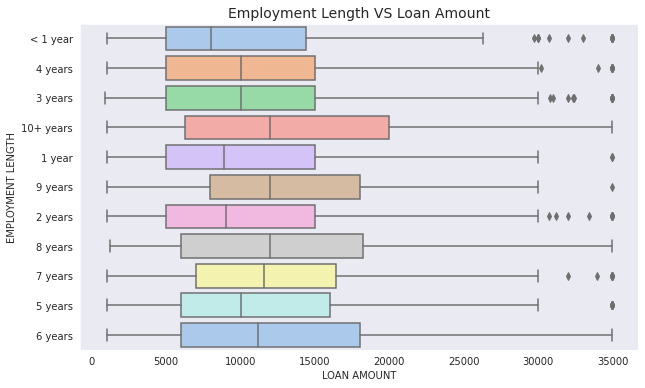

In [61]:
plt.figure(figsize=(10,6))

fig = sns.boxplot(y='emp_length', x='loan_amnt', data =defaulted_loans,palette='pastel')

fig.set_title('Employment Length VS Loan Amount',fontsize=14)
fig.set_ylabel('EMPLOYMENT LENGTH',fontsize =10)
fig.set_xlabel('LOAN AMOUNT',fontsize =10)
plt.show()

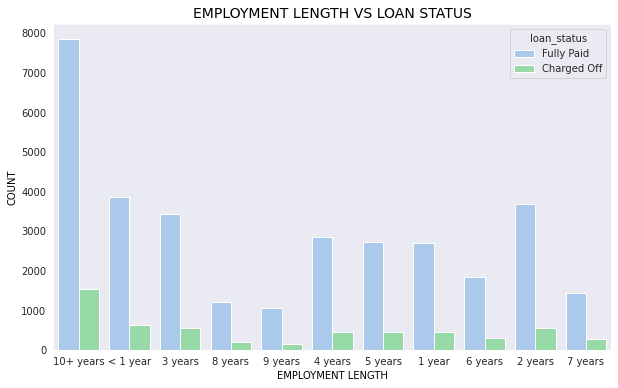

In [62]:
# Countplot for Employment Length by loan status as hue
plt.figure(figsize=(10,6))

ax =sns.countplot(x = cleaned_data['emp_length'],
              hue = cleaned_data['loan_status'],
              palette=['#a1c9f4', '#8de5a1'],
              data = cleaned_data)

# Naming the axis and title
ax.set_title('EMPLOYMENT LENGTH VS LOAN STATUS',fontsize=14,color='black')
ax.set_ylabel('COUNT',fontsize =10,color = 'black')
ax.set_xlabel('EMPLOYMENT LENGTH',fontsize =10,color = 'black')
plt.show()

### LOAN TERM VS LOAN STATUS on defaulted loans

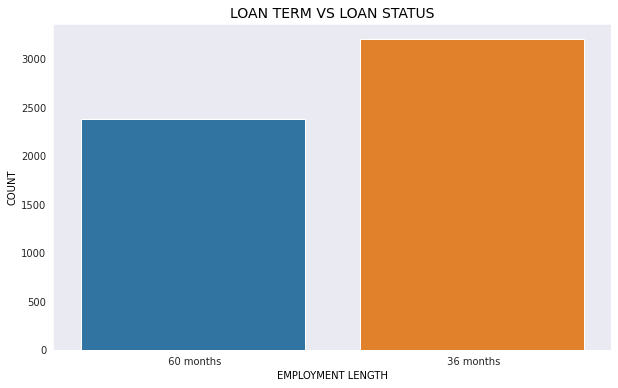

In [63]:
# Countplot for Loan Term by loan status as hue
plt.figure(figsize=(10,6))

fig = sns.countplot(x = defaulted_loans['term'], 
              data = defaulted_loans)

# Naming the axis and title
fig.set_title('LOAN TERM VS LOAN STATUS',fontsize=14,color='black')
fig.set_ylabel('COUNT',fontsize =10,color = 'black')
fig.set_xlabel('EMPLOYMENT LENGTH',fontsize =10,color = 'black')
plt.show()

### Interest Rate vs Term

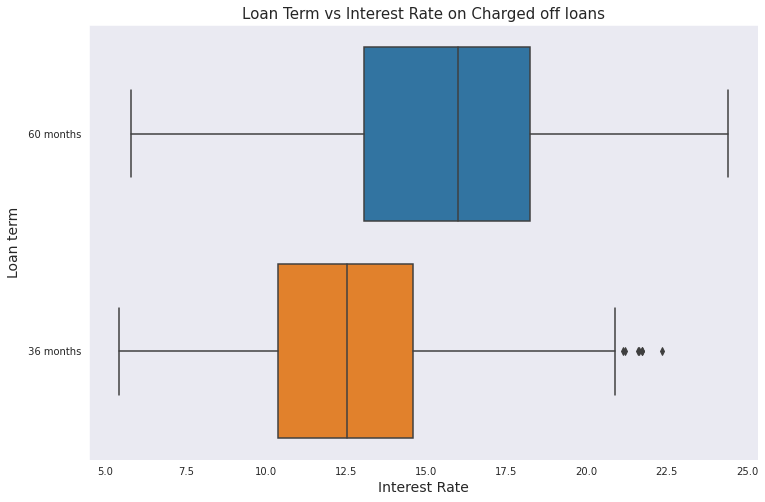

In [64]:
plt.figure(figsize=(12,8))
fig = sns.boxplot(y='term', x='int_rate', data =defaulted_loans)
fig.set_title('Loan Term vs Interest Rate on Charged off loans',fontsize=15)
fig.set_ylabel('Loan term',fontsize=14)
fig.set_xlabel('Interest Rate',fontsize=14)
plt.show()

### Loan Issue Year/Month vs Charged Off Loans

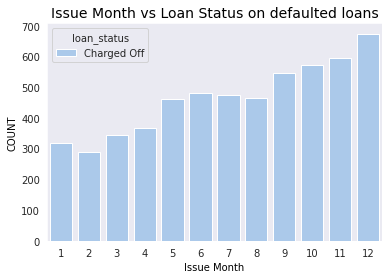

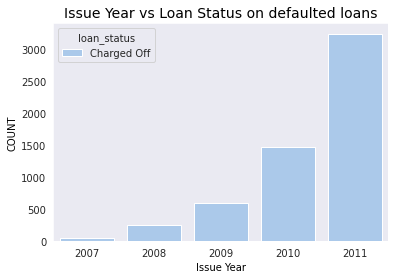

In [65]:

fig =sns.countplot(x = defaulted_loans['issue_month'],
              hue = defaulted_loans['loan_status'],
              palette=['#a1c9f4', '#8de5a1'],
              data = defaulted_loans)

# Naming the axis and title
fig.set_title('Issue Month vs Loan Status on defaulted loans',fontsize=14,color='black')
fig.set_ylabel('COUNT',fontsize =10,color = 'black')
fig.set_xlabel('Issue Month',fontsize =10,color = 'black')
plt.show()


fig =sns.countplot(x = defaulted_loans['issue_year'],
              hue = defaulted_loans['loan_status'],
              palette=['#a1c9f4', '#8de5a1'],
              data = defaulted_loans)

# Naming the axis and title
fig.set_title('Issue Year vs Loan Status on defaulted loans',fontsize=14,color='black')
fig.set_ylabel('COUNT',fontsize =10,color = 'black')
fig.set_xlabel('Issue Year',fontsize =10,color = 'black')
plt.show()

### OBSERVATIONS - BIVARIATE ON Ordered Categorical VARIABLES
 -  Grades F, G and H are the top contributors of loan defaults
 - Grade F and G have the median around 20k and Q3 at 25k
 - Grade A is the least with median at 7.5k
 - Most of states have median is at 10k for charged off loan
-  State AK, MT, KY, UT, TN are marginally above the 10k level and at 13k
- States AK, UT the Q3 is at 23k
- DTI does not seem to be contributing because the median is close to each other for Fully Paid and Charged Off
- 36 months term loans tend to default more
- Employees with experience more than 10+ years contribute to loan defaults more followed by year 6, 7, 8 and 9 .
- Loans with higher interest rate and longer term tend to default more
- Loans issued on 2011 december tend to default lot. This could be due to the financial crisis in US ([Black Moday](https://en.wikipedia.org/wiki/Black_Monday_(2011)#:~:text=In%20finance%20and%20investing%2C%20Black%20Monday%202011%20refers,in%20history%20the%20United%20States%20was%20downgraded.%20))

### BIVARIATE ANALYSIS - Un-Orderded Categorical variables

#### Home OwnerShip vs Loan Amount

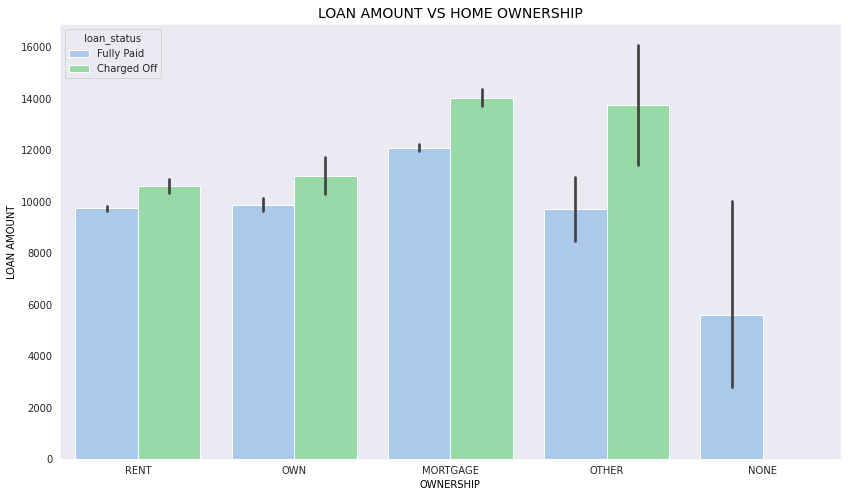

In [66]:
plt.figure(figsize=(14,8))
ax = sns.barplot(data = cleaned_data, 
                 x='home_ownership',
                 y='loan_amnt', 
                 hue ='loan_status',
                 palette=['#a1c9f4', '#8de5a1'])

# Naming the axis and title
ax.set_title('LOAN AMOUNT VS HOME OWNERSHIP',fontsize=14,color='black')
ax.set_xlabel('OWNERSHIP',fontsize =10,color = 'black')
ax.set_ylabel('LOAN AMOUNT',fontsize =10,color = 'black')
plt.show()

#### Interest Rate vs Purpose on defaulted loans

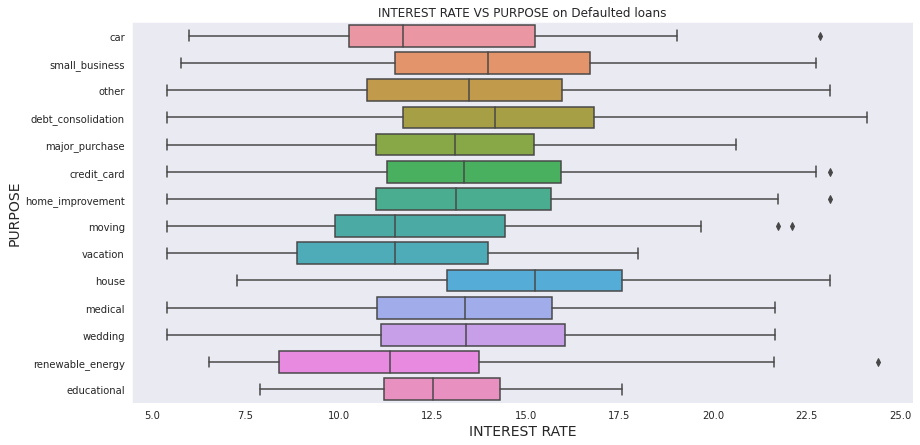

In [67]:
plt.figure(figsize=(14,7))
fig = sns.boxplot(x='int_rate', 
            y='purpose',
            data=defaulted_loans)

# Naming the axis and title
fig.set_xlabel('INTEREST RATE', fontsize = 14)
fig.set_ylabel('PURPOSE', fontsize = 14)
fig.set_title('INTEREST RATE VS PURPOSE on Defaulted loans')
plt.show()

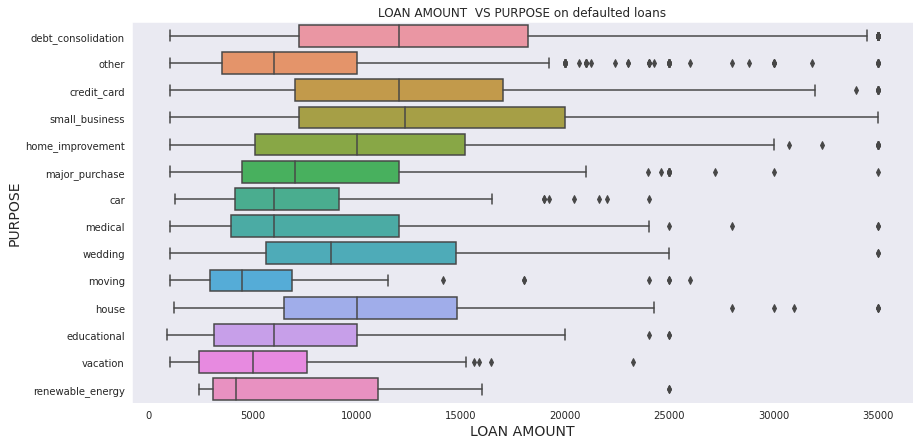

In [68]:
plt.figure(figsize=(14,7))
viz = sns.boxplot(x='loan_amnt', 
            y='purpose', 
            order=defaulted_loans['purpose'].value_counts().index,
            data=defaulted_loans)

# Naming the axis and title
viz.set_xlabel('LOAN AMOUNT', fontsize = 14)
viz.set_ylabel('PURPOSE', fontsize = 14)
viz.set_title('LOAN AMOUNT  VS PURPOSE on defaulted loans')
plt.show()

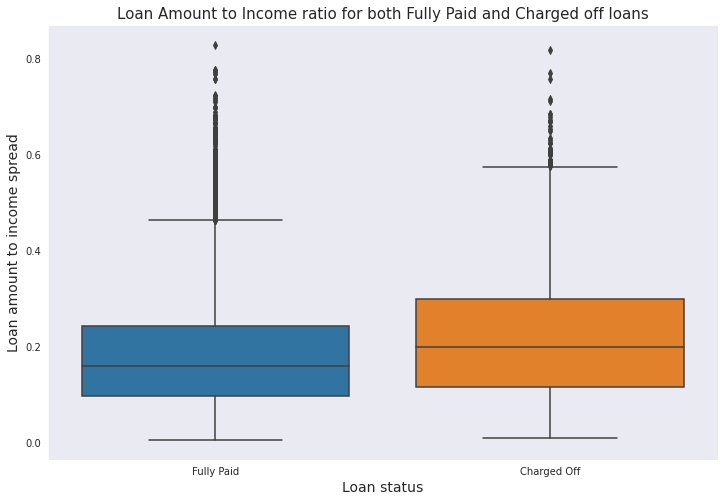

In [69]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(y='loan_amnt_inc_ratio', x='loan_status', data =cleaned_data)
ax.set_title('Loan Amount to Income ratio for both Fully Paid and Charged off loans',fontsize=15)
ax.set_ylabel('Loan amount to income spread',fontsize=14)
ax.set_xlabel('Loan status',fontsize=14)
plt.show()

### OBSERVATIONS - BIVARIATE ON Un-Ordered VARIABLES
 -  Borrowers with mortgaged home with loan amount greater than 14,000 tend to default more
 -  Housing loans with higher interest rate charge-off more
 - Debt consolidation, credit card and small business are the top loan purpose that contribute to defaults
 - Loan amount to income ratio contributes to loan defaults

### BIVARIATE ANALYSIS SUMMARY

 -  The violin plot shows the distribution of interest rates on charged off loans on the higher end 13 - 22% when compared to fully-paid loans, which reveals interest rate is one of the driving factor for loan default
 -  When the loan interest rate is greater than 16 % and the annual income of the person is less than 100000, the loan is more likely to be    defaulted. This reveals annual income and interest rate has a positive correlation to loan default.
 - When the debt to income ratio is more than 13 and interest rate is higher than 15 likely to default
- Giving loans at interest rate when the annual income is  < 1,50,000 leads to loan default
 - Customers with DTI greater than 15 is more likely to default
  -  Grades F, G and H are the top contributors of loan defaults
 - Grade F and G have the median around 20k and Q3 at 25k
 - Grade A is the least with median at 7.5k
 - Most of states have median is at 10k for charged off loan
-  State AK, MT, KY, UT, TN are marginally above the 10k level and at 13k
- States AK, UT the Q3 is at 23k
- DTI does not seem to be contributing because the median is close to each other for Fully Paid and Charged Off
- 36 months term loans tend to default more
- Employees with experience more than 10+ years contribute to loan defaults more followed by year 6, 7, 8 and 9 .
 -  Borrowers with mortgaged home with loan amount greater than 14,000 tend to default more
 -  Housing loans with higher interest rate charge-off more
 - Debt consolidation, credit card and small business are the top loan purpose that contribute to defaults
 - Loan amount to income ratio contributes to loan defaults

### Multi-Variate Analysis

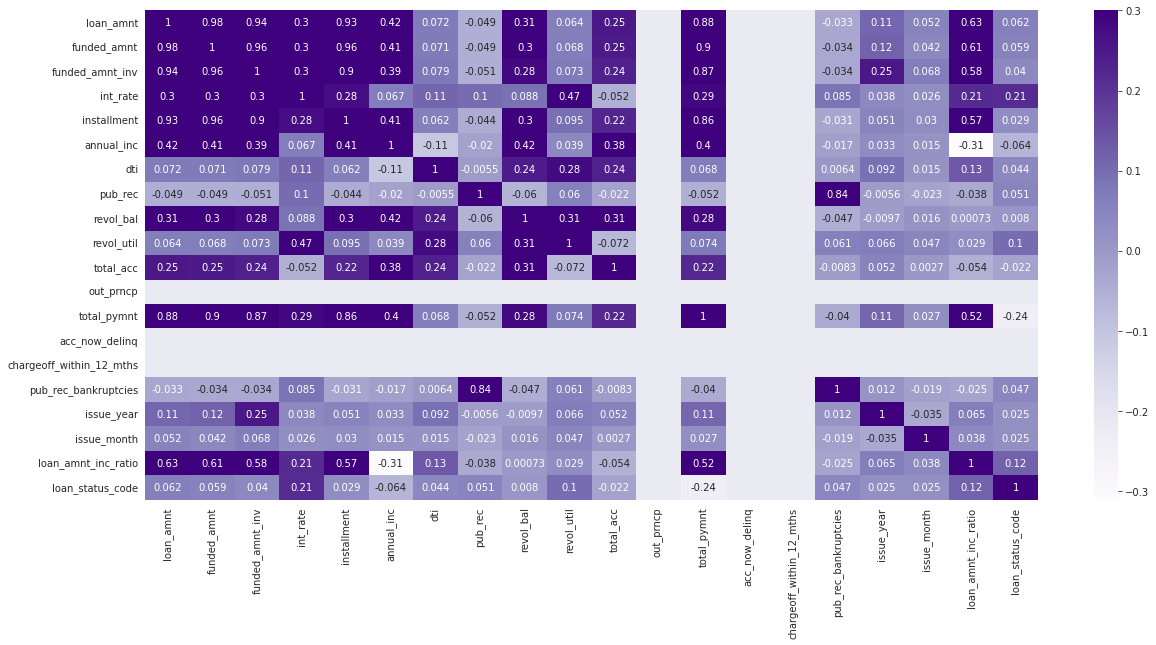

In [70]:
plt.figure(figsize=(20,9))
loan_status_map = {'Charged Off':1,'Fully Paid':0 }
cleaned_data["loan_status_code"] = cleaned_data["loan_status"].map(loan_status_map)
correlation = cleaned_data.corr()
sns.heatmap(correlation,  vmax=.3, annot=True,  cmap='Purples')
plt.show()

### Installment vs Interest Rate vs Verification Status vs Loan Amount

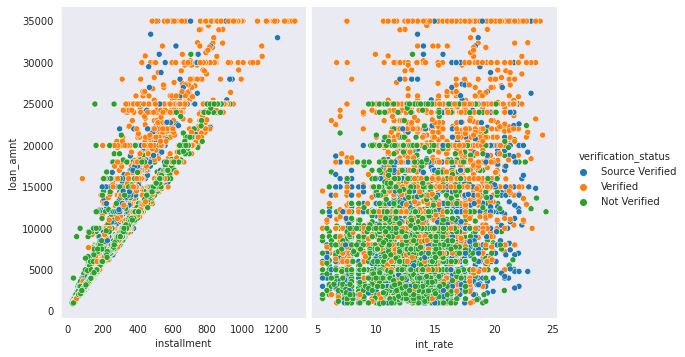

In [71]:
sns.pairplot(defaulted_loans,
             x_vars=['installment', 'int_rate'],
             y_vars=['loan_amnt'],
             diag_kind=None,
             hue='verification_status',
             height=5,
             aspect=0.8,
             kind='scatter')

### Home ownership vs Loan Amount by Verification Status on defaulted loans

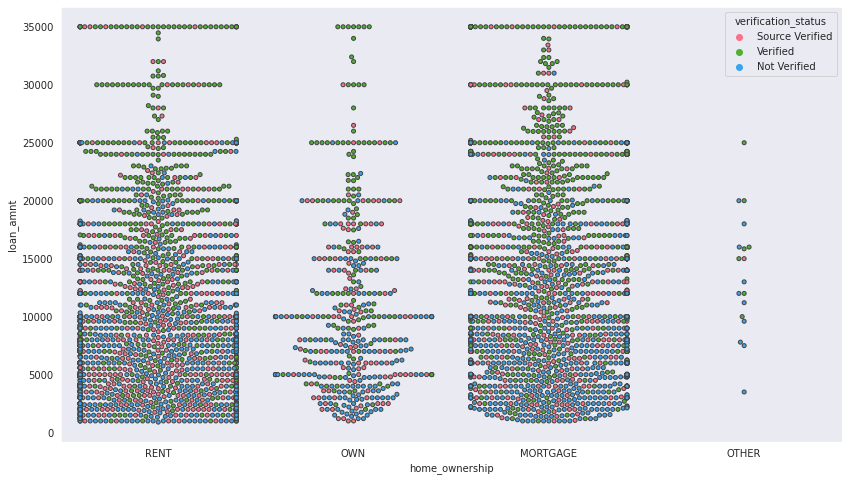

In [72]:
plt.figure(figsize=(14,8))
sns.swarmplot(x='home_ownership', 
              y='loan_amnt', 
              data=defaulted_loans,
              size=4,
              hue='verification_status',
              palette='husl',
              linewidth=1) 

plt.show()

### Home ownership vs Loan Amount vs Interest Rate Categories

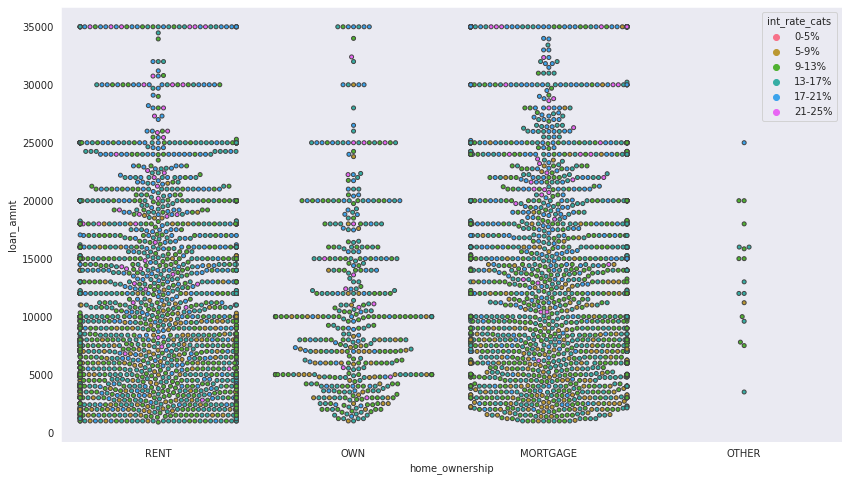

In [73]:
plt.figure(figsize=(14,8))
sns.swarmplot(x='home_ownership', 
              y='loan_amnt', 
              data=defaulted_loans,
              size=4,
              hue='int_rate_cats',
              palette='husl',
              linewidth=1) 

plt.show()

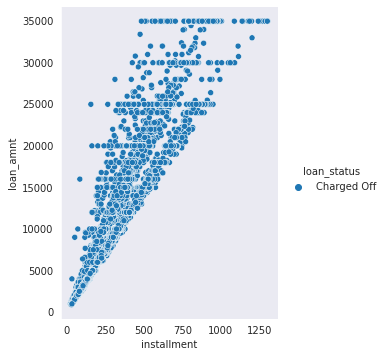

In [74]:
sns.pairplot(defaulted_loans,
             x_vars=['installment'],
             y_vars=['loan_amnt'],
             diag_kind=None,
             hue='loan_status',
             height=5,
             aspect=0.8,
             kind='scatter')

### Driving Factors for Loan Default
 - Higher interest rate (13-22%)
 - Employees with experience more than 10+ years contribute to loan defaults more followed by year 6, 7, 8 and 9 .
 - Interest rate greater than 16 % and the annual income of the person is less than 100000
 - DTI ratio more than 13 and interest rate is higher than 15% 
 - Loan defaulting increases with increase in public bankruptcy records.
 -  Borrowers with mortgaged home and rented home default more than people with own home.
 -  Housing loans with higher interest rate (above 9 %)
 -  Loan amount to income ratio contributes to loan defaults
 -  Grades F, G and H are the top contributors of loan defaults
-  Shorter loan tenure (36 months) 
-  State AK, MT, KY, UT, TN borrowed marginally above the 10k level median 13k and contribute to defaults.
 - Debt consolidation, credit card and small business are the top loan purpose that contribute to defaults
 - Loan amount to income ratio higher than .5 contributes to loan defaults
 - Verified loan amounts are given to employee with good experience and they tend to default.
 - Verified loans with high loan amount for borrowers with mortgage and rental homes
 - Installments increase with higher loan amount and so is the defaulting rate